In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter as SGfilter
from IPython.display import clear_output, display
import datetime
import joblib
from tqdm import tqdm
import sys
sys.path.append("../")
import constants
import environment


import gym
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import DQN
import evaluate_models as ev


In [2]:
n_simulations = 10
n_episodes_training = 10**6
n_episodes_test = 10**3

In [3]:
env = gym.make('SQLstruct-v1')
folder = "../"
retest = True

In [4]:
dqn_models = []
import glob
for i in range(n_simulations):
    for file in glob.glob(folder + "ignore_"+ str(i) +"_simulb64*.zip"):
        print(file[:-4], end = ":")
        model = DQN.load(file[:-4])
        dqn_models.append(model)
        print(model)

..\ignore_0_simulb64_20210611150812761734:<stable_baselines3.dqn.dqn.DQN object at 0x00000254EF14FB80>
..\ignore_1_simulb64_20210611153232537266:<stable_baselines3.dqn.dqn.DQN object at 0x00000254E7F14970>
..\ignore_2_simulb64_20210611155613999393:<stable_baselines3.dqn.dqn.DQN object at 0x00000254EF194BE0>
..\ignore_3_simulb64_20210611161958942685:<stable_baselines3.dqn.dqn.DQN object at 0x00000254EF194970>
..\ignore_4_simulb64_20210611164338006699:<stable_baselines3.dqn.dqn.DQN object at 0x00000254EF194A60>
..\ignore_5_simulb64_20210611170737938320:<stable_baselines3.dqn.dqn.DQN object at 0x00000254FC005F70>
..\ignore_6_simulb64_20210611175545526757:<stable_baselines3.dqn.dqn.DQN object at 0x00000254FC005D00>
..\ignore_7_simulb64_20210611173140429127:<stable_baselines3.dqn.dqn.DQN object at 0x000002550BCD0C40>
..\ignore_8_simulb64_20210611182004612175:<stable_baselines3.dqn.dqn.DQN object at 0x000002550BCD09D0>
..\ignore_9_simulb64_20210611184427157325:<stable_baselines3.dqn.dqn.DQN 

In [5]:
if(retest):
    rewards = []
    num_steps = []
    successes = []
    successes2 = []
    for i in tqdm(range(n_simulations)):
        out_rewards, out_num_steps, out_successes, out_successes2 = ev.test_episodes(dqn_models[i], env, num_episodes=1000)
        
        rewards.append(out_rewards)
        num_steps.append(out_num_steps)
        successes.append(np.mean(out_successes))
        successes2.append(np.mean(out_successes2))
    
    rewards = np.array(rewards)
    num_steps = np.array(num_steps)
    successes = np.array(successes)
    successes2 = np.array(successes2)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [03:41<00:00, 22.17s/it]


In [6]:
if(retest):
    timestamp = datetime.datetime.now().strftime("%Y%m%d%H%M%S%f")
    np.savetxt("ignore_struct_b64_num_steps"+timestamp+".csv", num_steps)
    np.savetxt("ignore_struct_b64_num_steps.csv", num_steps)
    np.savetxt("ignore_struct_b64_rewards"+timestamp+".csv", rewards)
    np.savetxt("ignore_struct_b64_rewards.csv", rewards)
    np.savetxt("ignore_struct_b64_successes.csv", rewards)
    retest = False
else:
    num_steps = np.loadtxt("ignore_struct_b64_num_steps.csv")
    rewards = np.loadtxt("ignore_struct_b64_rewards.csv")
    successes = np.loadtxt("ignore_struct_b64_successes")
    

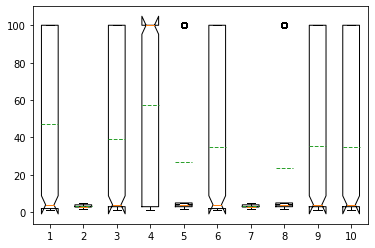

In [7]:
plt.boxplot(num_steps.T, notch = True, showmeans = True, meanline = True)
plt.savefig("figures/sim2_b64_test.png")

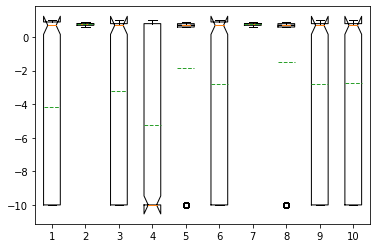

In [8]:
plt.boxplot(rewards.T, notch = True, showmeans = True, meanline = True)
plt.savefig("figures/sim2_b64_test_reward.png")

[0.538 1.    0.632 0.439 0.759 0.667 1.    0.791 0.667 0.676]


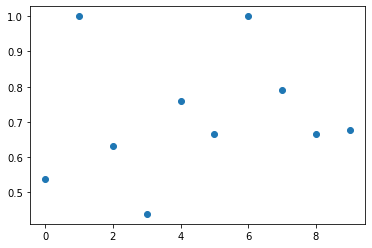

In [10]:
plt.plot(successes2, "o")
print(successes2)